# K-Means Clustering Algorithm

In [41]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np


In [42]:
centroid = [(-5,-5),(5,5),(-2.5,2.5)]
cluster_std = (1,1,1)

In [43]:
x, y = make_blobs(n_samples=100, n_features=2, centers=centroid, cluster_std=cluster_std, random_state=2)


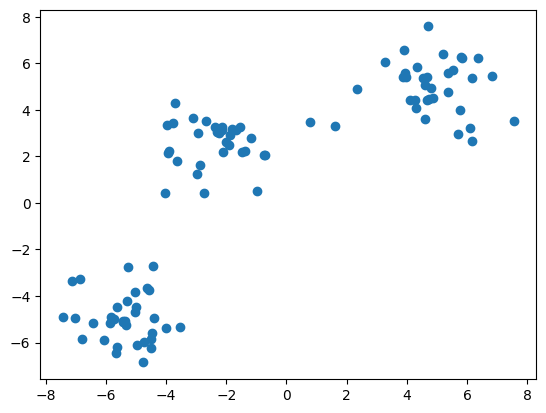

In [44]:
plt.scatter(x[:,0], x[:,1])

## KMeans code

In [45]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroid = None
        self.inertia_ = 0

    def fit_predict(self, X):
        # Initialize centroids by randomly selecting points from the data
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroid = X[random_index]

        for i in range(self.max_iter):
            # Assign clusters
            cluster_group = self.assign_cluster(X)
            old_centroids = self.centroid.copy()

            # Update centroids
            self.centroid = self.move_centroids(X, cluster_group)

            # Check for convergence
            if np.allclose(old_centroids, self.centroid):
                break

        self.inertia_ = self.calculate_inertia(X, cluster_group)
        return cluster_group

    def assign_cluster(self, X):
        cluster_group = []
        for row in X:
            distances = []
            for centroid in self.centroid:
                # Calculate Euclidean distance
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            # Assign to the closest centroid
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_types = np.unique(cluster_group)

        for cluster_type in cluster_types:
            # Calculate the mean of all points in the current cluster
            new_centroids.append(X[cluster_group == cluster_type].mean(axis=0))

        return np.array(new_centroids)
    
    def calculate_inertia(self, X, cluster_group):
        inertia = 0
        for i, centroid in enumerate(self.centroid):
            # Get points in the current cluster
            cluster_points = X[cluster_group == i]
            # Compute squared distance for all points in the cluster
            inertia += np.sum((cluster_points - centroid) ** 2)
        return inertia
    



In [46]:
km = KMeans(n_clusters=3, max_iter=500)
y_means = km.fit_predict(x)

In [47]:
y_means

array([2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1,
       0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1,
       1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2,
       0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0])

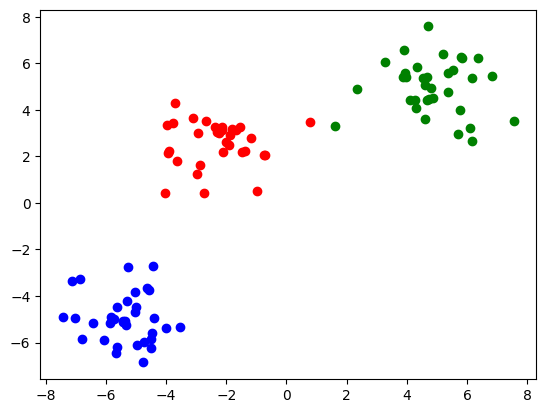

In [48]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], color = "red")
plt.scatter(x[y_means==1,0], x[y_means==1,1], color = "green")
plt.scatter(x[y_means==2,0], x[y_means==2,1], color = "blue")


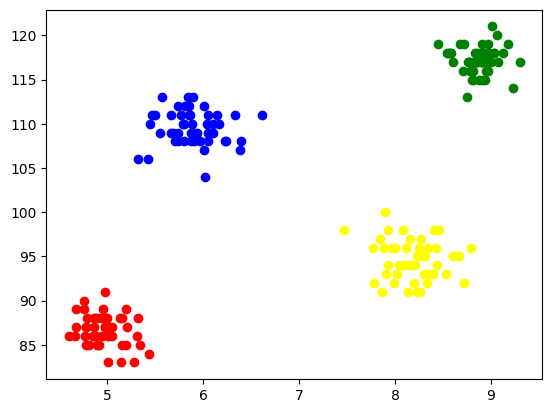

In [49]:
df = pd.read_csv("D:\Machine Learning\K-Means\student_clustering.csv")
X = df.iloc[:,:].values

km2 = KMeans(n_clusters=4, max_iter=100)
y_means2 = km2.fit_predict(X)

plt.scatter(X[y_means2==0,0], X[y_means2==0,1], color="red")
plt.scatter(X[y_means2==1,0], X[y_means2==1,1], color="green")
plt.scatter(X[y_means2==2,0], X[y_means2==2,1], color="blue")
plt.scatter(X[y_means2==3,0], X[y_means2==3,1], color="yellow")
plt.show()



In [50]:
km2.inertia_

681.9696599999999